# Setup

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Question 1 
### Hough Transform

In [83]:
"""
Hough Transform need to set param1 and param2 in order to detect the circle shape
"""
img = cv.imread('coins_1.jfif')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray,(7,7), 2)
                       
rows = gray.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, rows/8,
                         param1 = 70, param2 = 30)

if circles is not None:
    circles = np.uint8(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv.circle(img, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv.circle(img, center, radius, (255, 255, 255), 3)
        
cv.imshow('Hough Transform', img)
cv.waitKey()
cv.destroyAllWindows()

### Blobs

In [84]:
"""
Bobs Detection need to set few params in order to detect the circle shape
"""
img = cv.imread('coins_1.jfif')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray,(7,7), 2)

# parameter
params = cv.SimpleBlobDetector_Params()
params.thresholdStep = 5
params.minThreshold = 10
params.maxThreshold = 255 

params.filterByColor = True
params.blobColor = 255
params.filterByArea = True
params.maxArea = 3000
params.filterByConvexity = False
params.filterByInertia = False
params.minDistBetweenBlobs = 10

# create object detector
detector = cv.SimpleBlobDetector_create(params)
keypoints = detector.detect(gray)

# draw keypoints
im_with_keypoints = cv.drawKeypoints(img, keypoints, np.zeros((1, 1)), (0, 255, 255), 
                                    cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv.imshow('blobs', im_with_keypoints)
cv.waitKey(0)
cv.destroyAllWindows()

## Question 2
### HSV

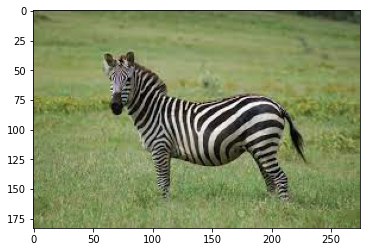

In [242]:
img = cv.imread('zebra.jfif')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

plt.figure()
plt.imshow(img_rgb)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

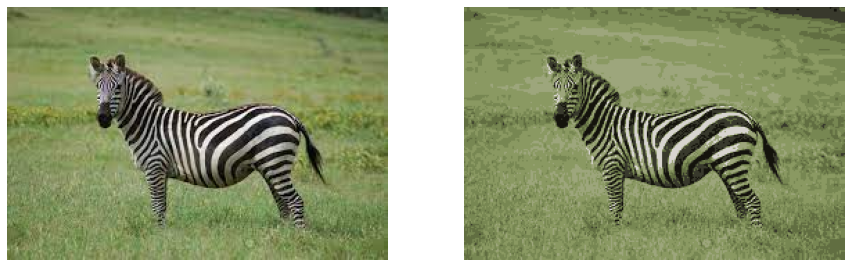

In [214]:
img_reshape = img_rgb.reshape((-1,3))
img_reshape = np.float32(img_reshape)


criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 7
attempts = 8
ret,label, center = cv.kmeans(img_reshape,K, None, criteria, attempts, cv.KMEANS_RANDOM_CENTERS)

# center
center = np.uint8(center)

# 
res = center[label.ravel()]
res_img = res.reshape(img_rgb.shape)

plt.figure(figsize = (15,15))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(res_img)
plt.axis("off")
plt.show

In [137]:
# 2 helper functions

def centroid_histogram(clust_labels):
    # Create histogram based on the number of pixels assigned to each cluster
    numLabels = len(np.unique(clust_labels))
    hist, _ = np.histogram(clust_labels, bins = numLabels)
    
    # Normalize the histogram, such that it sums to one
    hist = hist.astype("float32")
    hist /= hist.sum()
    
    return hist

def plot_colors(hist, centroids):
    # Initialize bar chart representing relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype = np.uint8)
    startX = 0
    
    # loop over the percentage of each cluster and the color of each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent*300)
        cv.rectangle(bar, (int(startX), 0), (int(endX), 50),
                    color.astype("uint8").tolist(), -1)
        startX = endX
        
    # return bar chart
    return bar

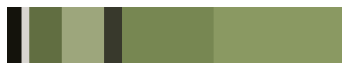

In [215]:
# histogram of clusters
hist = centroid_histogram(label)
bar = plot_colors(hist, center)

plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

In [189]:
from numpy import linalg as LN

In [239]:
white = (255,255,255)
black = (0,0,0)
gray = (60,60,60)

idx_white = np.argmin(LN.norm(white - center, axis = 1))
idx_black = np.argmin(LN.norm(black - center, axis = 1))
idx_gray = np.argmin(LN.norm(gray - center, axis = 1))

In [240]:
print(idx_black)
print(idx_white)
print(idx_gray)

0
1
4


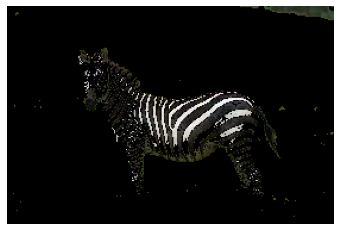

In [241]:
mask_petal_black = res_img == center[idx_black]
mask_petal_white = res_img == center[idx_white]
mask_petal_gray = res_img == center[idx_gray]

mask_petal = mask_petal_black + mask_petal_white + mask_petal_gray

seg_result = img_rgb*(mask_petal.astype("uint8"))

plt.imshow(seg_result)
plt.axis("off")
plt.show()

### HSV

<function matplotlib.pyplot.show(close=None, block=None)>

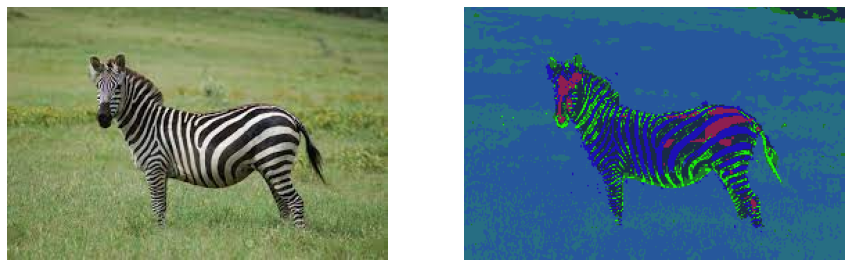

In [244]:
img_reshape = img_hsv.reshape((-1,3))
img_reshape = np.float32(img_reshape)


criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 7
attempts = 8
ret,label, center = cv.kmeans(img_reshape,K, None, criteria, attempts, cv.KMEANS_RANDOM_CENTERS)

# center
center = np.uint8(center)

# 
res = center[label.ravel()]
res_img = res.reshape(img_rgb.shape)

plt.figure(figsize = (15,15))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(res_img)
plt.axis("off")
plt.show

In [245]:
# 2 helper functions

def centroid_histogram(clust_labels):
    # Create histogram based on the number of pixels assigned to each cluster
    numLabels = len(np.unique(clust_labels))
    hist, _ = np.histogram(clust_labels, bins = numLabels)
    
    # Normalize the histogram, such that it sums to one
    hist = hist.astype("float32")
    hist /= hist.sum()
    
    return hist

def plot_colors(hist, centroids):
    # Initialize bar chart representing relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype = np.uint8)
    startX = 0
    
    # loop over the percentage of each cluster and the color of each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent*300)
        cv.rectangle(bar, (int(startX), 0), (int(endX), 50),
                    color.astype("uint8").tolist(), -1)
        startX = endX
        
    # return bar chart
    return bar

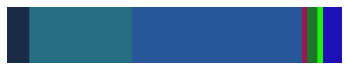

In [246]:
# histogram of clusters
hist = centroid_histogram(label)
bar = plot_colors(hist, center)

plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

In [335]:
white = (100,200,3)
black = (20,52,200)
gray = (0,100,0)

idx_white = np.argmin(LN.norm(white - center, axis = 1))
idx_black = np.argmin(LN.norm(black - center, axis = 1))
idx_gray = np.argmin(LN.norm(gray - center, axis = 1))

In [336]:
print(idx_black)
print(idx_white)
print(idx_gray)

6
5
4


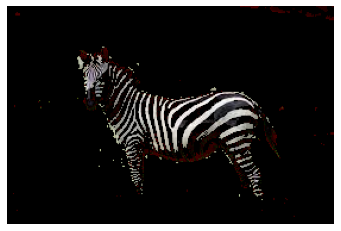

In [337]:
mask_petal_black = res_img == center[idx_black]
mask_petal_white = res_img == center[idx_white]
#mask_petal_gray = res_img == center[idx_gray]

mask_petal = mask_petal_black + mask_petal_white + mask_petal_gray

seg_result = img_rgb*(mask_petal.astype("uint8"))

plt.imshow(seg_result)
plt.axis("off")
plt.show()

## BGR and HSV
### HSV color space is able to segment the zebra more clearly than BGR